In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Deep-Learning/Deep-Learning/(04) 01. التنبؤ بتسرب الزبائن في بنك باستخدام الشبكات العصبية/d4c.csv')

In [12]:
value_counts = df['Exited'].value_counts()

value_counts

,count
Exited,
0,7963
1,2037


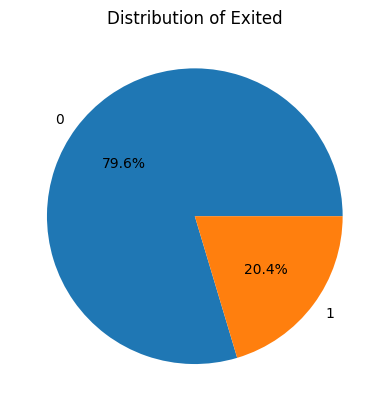

In [13]:
import matplotlib.pyplot as plt

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of Exited')

plt.show()

In [14]:
# pip install --upgrade scikit-learn imbalanced-learn imblearn

In [15]:
from imblearn.over_sampling import RandomOverSampler

input_columns = df.drop('Exited', axis=1)

class_column = df['Exited']

oversampler = RandomOverSampler(random_state=0)

input_columns_resampled, class_column_resampled = oversampler.fit_resample(input_columns, class_column)


df_balanced = pd.concat([input_columns_resampled, class_column_resampled], axis=1)

class_distribution = df_balanced['Exited'].value_counts()
print(class_distribution)

Exited
1    7963
0    7963
Name: count, dtype: int64


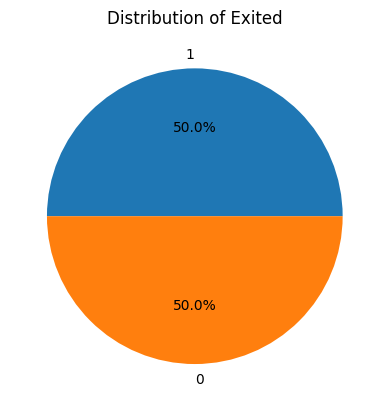

In [16]:
value_counts = df_balanced['Exited'].value_counts()

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of Exited')

plt.show()

In [17]:
X = df_balanced.iloc[:, 3:13].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [565 'Germany' 'Male' ... 1 0 175070.94]
 [553 'Spain' 'Female' ... 0 1 30730.95]
 [492 'France' 'Female' ... 1 1 182865.09]]


In [18]:
y = df_balanced.iloc[:, 13].values
print(y)

[1 0 1 ... 1 1 1]


In [19]:
print(X[:, 2])

['Female' 'Female' 'Female' ... 'Male' 'Female' 'Female']


In [20]:
from sklearn.preprocessing import LabelEncoder

labelencoder_gender = LabelEncoder()
X[:, 2] = labelencoder_gender.fit_transform(X[:, 2])

In [21]:
print(X[:, 2])

[0 0 0 ... 1 0 0]


In [22]:
labelencoder_gender.transform(["Male","Female"])

array([1, 0])

In [23]:
import numpy as np

distinct_values = np.unique(X[:, 1])
print(distinct_values)

['France' 'Germany' 'Spain']


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')


X = ct.fit_transform(X)

In [25]:
print(X[0])

[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [28]:
print(X_train)

[[-0.93041226 -0.6660016   1.83627033 ... -1.55261795 -0.92478892
  -0.87888847]
 [ 1.07479237 -0.6660016  -0.54458213 ...  0.64407345 -0.92478892
  -1.26171023]
 [-0.93041226 -0.6660016   1.83627033 ...  0.64407345  1.08132784
   1.70394276]
 ...
 [-0.93041226 -0.6660016   1.83627033 ...  0.64407345  1.08132784
   0.83065375]
 [-0.93041226  1.50149789 -0.54458213 ...  0.64407345 -0.92478892
  -1.2493363 ]
 [-0.93041226  1.50149789 -0.54458213 ...  0.64407345 -0.92478892
   0.31223535]]


In [29]:
import numpy as np
import tensorflow as tf

np.random.seed(42)

tf.random.set_seed(42)

In [30]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [31]:
input_dim = len(X_train[0])

model.add(Dense(6, activation = 'relu', input_dim = input_dim))

model.add(Dense(6, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6110 - loss: 0.6548
Epoch 2/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7056 - loss: 0.5767
Epoch 3/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7124 - loss: 0.5629
Epoch 4/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7190 - loss: 0.5503
Epoch 5/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7344 - loss: 0.5294
Epoch 6/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7594 - loss: 0.4992
Epoch 7/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7670 - loss: 0.4775
Epoch 8/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7723 - loss: 0.4687
Epoch 9/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7757 - loss: 0.4651
Epoch 10/10
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7785 - loss: 0.4631


In [35]:
evaluation = model.evaluate(X_test, y_test)

print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7587 - loss: 0.4763
Loss: 0.4743790924549103
Accuracy: 0.7677046656608582


In [36]:
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5)
y_pred_binary

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

Accuracy: 0.7677046710195882
Precision: 0.7725430597771024
Recall: 0.7621189405297352
F1 Score: 0.7672955974842768


In [38]:
model = Sequential()

input_dim = len(X_train[0])

model.add(Dense(128, activation = 'relu', input_dim = input_dim))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(32, activation = 'relu'))

model.add(Dense(16, activation = 'relu'))

model.add(Dense(8, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy' ])

model.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1195/1195 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7117 - loss: 0.5531
Epoch 2/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7855 - loss: 0.4534
Epoch 3/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7957 - loss: 0.4348
Epoch 4/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8050 - loss: 0.4213
Epoch 5/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8116 - loss: 0.4058
Epoch 6/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8196 - loss: 0.3891
Epoch 7/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8290 - loss: 0.3735
Epoch 8/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8398 - loss: 0.3553
Epoch 9/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8477 - loss: 0.3403
Epoch 10/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8560 - loss: 0.3251
Epoch 11/20
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8647 - loss: 0.3112
Epoch 12/20
1195/1195 ━━━━━━━━━━━━━━━━━━━

In [39]:
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.850828729281768
Precision: 0.8125277654375833
Recall: 0.9140429785107447
F1 Score: 0.8603010348071496


In [40]:
model.save("churn_model.keras")

In [41]:
from joblib import dump

dump(labelencoder_gender, "churn_label_encoder.pkl")

['churn_label_encoder.pkl']

In [42]:
from joblib import dump

dump(ct, "churn_column_transformer.pkl")

['churn_column_transformer.pkl']

In [43]:
from joblib import dump

dump(sc, "churn_standard_scaler.pkl")

['churn_standard_scaler.pkl']

In [44]:
new_customer = np.array( [[600,"France","Male",40, 3, 60000, 2, 1, 1, 50000]])

In [45]:
from joblib import load

labelencoder_gender_loaded=load("churn_label_encoder.pkl")

new_customer[:, 2] = labelencoder_gender_loaded.transform(new_customer[:, 2])

In [46]:
from joblib import load

ct_loaded = load("churn_column_transformer.pkl")

new_customer = ct.transform(new_customer)

In [47]:
from joblib import load

sc_loaded = load("churn_standard_scaler.pkl")

new_customer = sc_loaded.transform(new_customer)
print(new_customer)

[[ 1.07479237 -0.6660016  -0.54458213 -0.49084051  0.98454672 -0.10120986
  -0.67592971 -0.35207194  0.73346722  0.64407345  1.08132784 -0.88180893]]


In [48]:
from keras.models import load_model

loaded_model = load_model("churn_model.keras")

In [49]:
new_prediction_proba = loaded_model.predict(new_customer)

new_prediction = (new_prediction_proba > 0.5)

print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[False]]
